In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:86% !important;}
div.cell.code_cell.rendered{width:100%;}
div.CodeMirror {font-family:Consolas; font-size:12pt;}
div.output {font-size:15pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:12pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:15px;}
</style>
"""))

In [4]:
# import
import numpy as np
import seaborn as sns # iris 데이터
import pandas as pd # 원핫인코딩
from sklearn.preprocessing import LabelEncoder # 라벨인코딩(문자 -> 숫자)
from tensorflow.keras.utils import to_categorical # 원핫인코딩
from sklearn.model_selection import train_test_split # 데이터 분할(층화추출)
from tensorflow.keras.models import Sequential, load_model, save_model
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt # 학습과정 시각화
from tensorflow.keras.datasets import mnist

In [5]:
# 1. 데이터 셋
width = 28; height=28
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

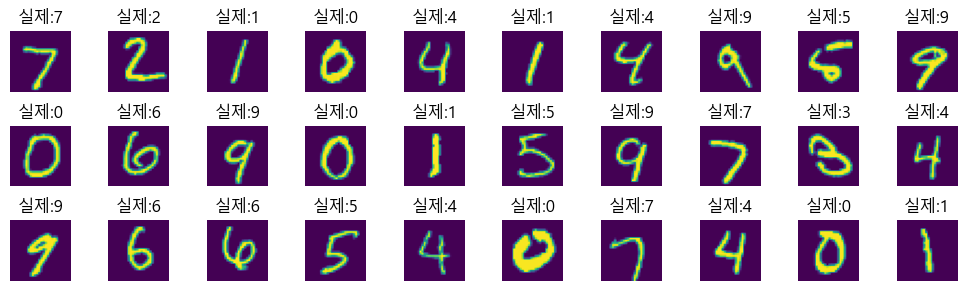

In [16]:
plt_row = 3
plt_col = 10
# plt.figure(figsize=(plt_col, plt_row))
plt.rcParams['figure.figsize']=[plt_col, plt_row]
plt.rc("font", family="Malgun Gothic") # window에서 한글 시각화
# plt.rc("font", family="NanumBarunGothic") # 코랩에서 한글 시각화
fig, axes = plt.subplots(plt_row, plt_col)
# axes[0, 0].imshow(X_test[0].reshape(width, height))
# axes[0, 0].axis("off")
# title = "실제:{}".format(y_test[0])
# axes[0, 0].set_title(title)
for i in range(plt_row*plt_col) :
    subax = axes[i//plt_col, i%plt_col] # // : 몫연산자, % : 나머지연산자
    subax.imshow(X_test[i].reshape(width, height))
    subax.axis('off')
    title = "실제:{}".format(y_test[i])
    subax.set_title(title)
# plt.tight_layout()

# 1. DNN

In [21]:
%%time
# 1. 데이터 생성 및 전처리
width=28; height=28
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_val = X_train[50000:]
y_val = y_train[50000:]
X_train = X_train[:50000]
y_train = y_train[:50000]
# 독립변수(28, 28) -> 784 1차원 -> 실수형 변환 -> 스케일 조정
X_train = X_train.reshape(-1, width*height).astype('float32')/255.0
X_val = X_val.reshape(-1, width*height).astype('float32')/255.0
X_test = X_test.reshape(-1, width*height).astype('float32')/255.0
# 타겟변수 원핫인코딩
Y_train = to_categorical(y_train)
Y_val = to_categorical(y_val)
Y_test = to_categorical(y_test)

X_train.shape, Y_train.shape, X_val.shape, Y_val.shape, X_test.shape, Y_test.shape

# 2. 모델 구성
model = Sequential([
    Input(shape=(width*height,)),
    Dense(units=1024, activation='relu'),
    Dropout(0.3),
    Dense(units=512, activation='relu'),
    Dropout(0.3),
    Dense(units=256, activation='relu'),
    Dropout(0.3),
    Dense(units=10, activation='softmax')
])
# model.summary()
# 3. 학습 설정
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# 4. 학습
model.fit(X_train, Y_train,
          epochs=50,
          validation_data=(X_val, Y_val),
          verbose=1)

Epoch 1/50
1563/1563 [==============================] - 19s 12ms/step - loss: 0.2792 - accuracy: 0.9152 - val_loss: 0.1150 - val_accuracy: 0.9656
Epoch 2/50
1563/1563 [==============================] - 19s 12ms/step - loss: 0.1434 - accuracy: 0.9585 - val_loss: 0.0922 - val_accuracy: 0.9727
Epoch 3/50
1563/1563 [==============================] - 19s 12ms/step - loss: 0.1167 - accuracy: 0.9665 - val_loss: 0.0934 - val_accuracy: 0.9722
Epoch 4/50
1563/1563 [==============================] - 19s 12ms/step - loss: 0.0961 - accuracy: 0.9721 - val_loss: 0.0829 - val_accuracy: 0.9759
Epoch 5/50
1563/1563 [==============================] - 19s 12ms/step - loss: 0.0849 - accuracy: 0.9748 - val_loss: 0.0946 - val_accuracy: 0.9747
Epoch 6/50
1563/1563 [==============================] - 20s 13ms/step - loss: 0.0787 - accuracy: 0.9773 - val_loss: 0.0829 - val_accuracy: 0.9788
Epoch 7/50
1563/1563 [==============================] - 20s 13ms/step - loss: 0.0736 - accuracy: 0.9790 - val_loss: 0.0802 -

In [22]:
model.save('mnist.dnn.h5')

In [23]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.1959 - accuracy: 0.9825


[0.19585879147052765, 0.9825000166893005]

In [27]:
# 혼동행렬
from sklearn.metrics import confusion_matrix
print("실제값 :",y_test)
print("실제값 :", np.argmax(Y_test, axis=1))
yhat = model.predict(X_test).argmax(axis=1)
cmatrix = confusion_matrix(y_test, yhat)
cmatrix

실제값 : [7 2 1 ... 4 5 6]
실제값 : [7 2 1 ... 4 5 6]
313/313 [==============================] - 1s 4ms/step


array([[ 968,    2,    0,    0,    0,    0,    7,    1,    2,    0],
       [   0, 1127,    0,    1,    0,    1,    4,    1,    1,    0],
       [   2,    1, 1014,    0,    3,    0,    3,    5,    4,    0],
       [   0,    0,    5,  994,    0,    3,    0,    2,    2,    4],
       [   0,    1,    1,    0,  965,    0,    6,    1,    0,    8],
       [   1,    0,    0,    5,    1,  871,    5,    0,    4,    5],
       [   2,    2,    0,    0,    1,    2,  950,    0,    1,    0],
       [   2,    0,    7,    3,    0,    0,    0, 1012,    1,    3],
       [   3,    2,    2,    2,    6,    3,    4,    2,  945,    5],
       [   1,    3,    0,    5,   11,    5,    2,    3,    0,  979]],
      dtype=int64)

In [28]:
# 실제값과 예츠값이 다른 갯수(방법 1)
cnt = 0
for i, row in enumerate(cmatrix) :
    for j, data in enumerate(row) :
        if i!=j :
            cnt += data
print('예측이 틀린 갯수 : ', cnt)

예측이 틀린 갯수 :  175


In [29]:
# 실제값과 예측값이 다른 갯수(방법 2)
cnt = 0
for y, h in zip(y_test, yhat) :
    if y != h :
        cnt += 1
print('예측이 틀린 갯수 : ', cnt)


예측이 틀린 갯수 :  175


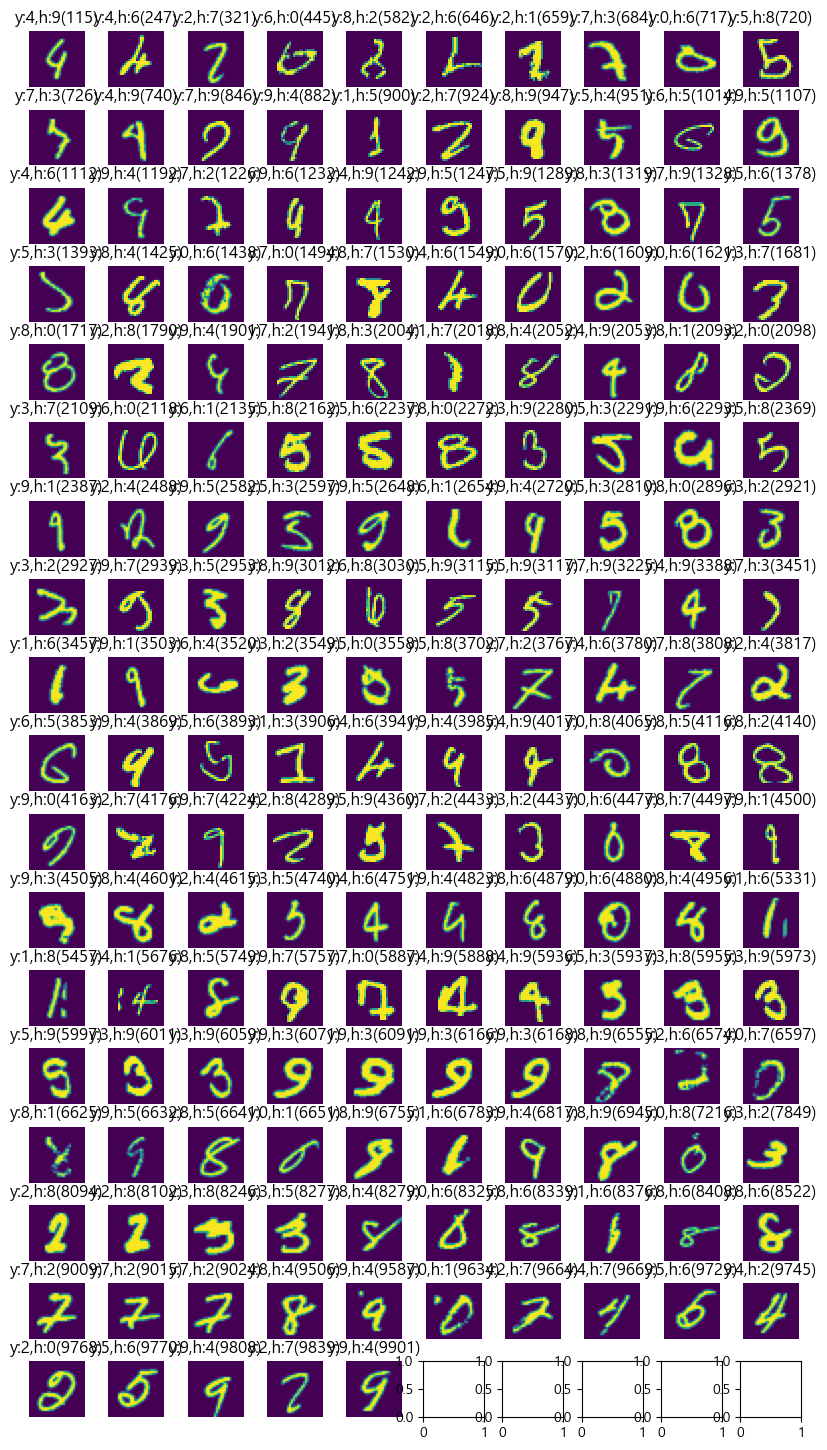

In [33]:
# CNN을 사용하여 예측이 틀린 데이터 출력(yhat과 y_test가 다른 것들 175개)
plt_row = 18
plt_col = 10
# plt.figure(figsize=(plt_col, plt_row))
plt.rcParams['figure.figsize']=[plt_col, plt_row]
plt.rc("font", family="Malgun Gothic") # window에서 한글 시각화
# plt.rc("font", family="NanumBarunGothic") # 코랩에서 한글 시각화
fig, axes = plt.subplots(plt_row, plt_col)
plt.subplots_adjust(hspace=0.4, wspace=0.3)

i=0 # yhat 과 y_test의 index -> yhat[i], y_test[i]를 비교
cnt=0 # 이미지 출력 횟수

while (i < len(y_test)) & (cnt < plt_row*plt_col) :
    if yhat[i] == y_test[i] :
        i += 1
        continue
    subax = axes[cnt//plt_col, cnt%plt_col] # // : 몫연산자, % : 나머지연산자
    subax.imshow(X_test[i].reshape(width, height))
    subax.axis('off')
    title = "y:{},h:{}({})".format(y_test[i], yhat[i], i)
    subax.set_title(title)
    cnt += 1 # 이미지 출력 번호 증가
    i += 1 # index 증가
# plt.tight_layout()

# 2. CNN(컨볼루션 레이어 포함) -  6장 교안 p31

In [35]:
%%time
# 1. 데이터 생성 및 전처리
width=28; height=28
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_val = X_train[50000:]
y_val = y_train[50000:]
X_train = X_train[:50000]
y_train = y_train[:50000]
# 독립변수(28, 28) -> 784 1차원 -> 실수형 변환 -> 스케일 조정
X_train = X_train.reshape(-1, width*height).astype('float32')/255.0
X_val = X_val.reshape(-1, width*height).astype('float32')/255.0
X_test = X_test.reshape(-1, width*height).astype('float32')/255.0
# 타겟변수 원핫인코딩
Y_train = to_categorical(y_train)
Y_val = to_categorical(y_val)
Y_test = to_categorical(y_test)

X_train.shape, Y_train.shape, X_val.shape, Y_val.shape, X_test.shape, Y_test.shape

CPU times: total: 391 ms
Wall time: 395 ms


((50000, 784),
 (50000, 10),
 (10000, 784),
 (10000, 10),
 (10000, 784),
 (10000, 10))

In [ ]:
# 2. 모델 생성